Salary.csv
Провести предварительный анализ данных.
Создать наилучшую модель для прогнозирования заработной платы.
Произвести анализ модели.

Cars.csv
Провести предварительный анализ данных.
Провести корреляционный анализ. Построить модель для прогнозирования цены автомобиля.
Произвести анализ модели.

Пишите больше комментариев с выводами!

Сдать отчёт формате .ipynb или .py (выводы оформлять в виде многострочного комментария после соответствующей строки) в папку "Работы 22.11" до 14:30. В противном случае вы получите максимально 6 баллов за выполнение практического задания.

Максимальные баллы:
Кто пришел и сдал вовремя = 10
Кто сдаст позже = 6
Кто не пришел без причины = 2
Кто не пришел по уважительной делает в сл раз другие задания = 10
Кто сдал похожие работы = 2 обоим

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

salary = pd.read_csv('Salary.csv')
cars = pd.read_csv('Cars.csv', sep=';')

# задача 1

In [2]:
salary.head()

,YearsExperience,Salary
0,3.3,64446.0
1,8.0,101303.0
2,6.1,93941.0
3,10.6,121873.0
4,9.7,112636.0


In [38]:
salary = salary.rename(columns={'YearsExperience' : 'years_experience', 'Salary' : 'salary'})

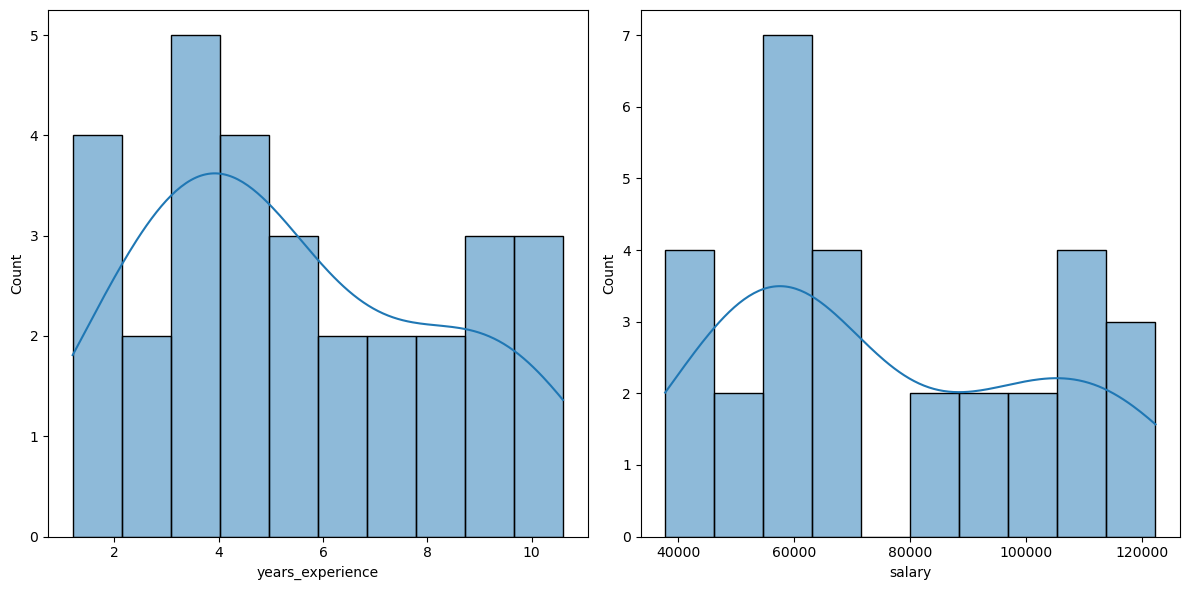

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data=salary.years_experience, bins=10, kde=True, ax=axes[0])

sns.histplot(data=salary.salary, bins=10, kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

In [9]:
# Проверим гипотезу о том, что обе переменные распределены нормальным образом
expected = norm(loc=salary.salary.mean(), scale=salary.salary.std()).rvs(salary.shape[0])
ks_test = kstest(salary.salary, expected)
print('Kolmogorov-Smirnov Salary ' + str(ks_test.pvalue))
expected = norm(loc=salary.years_experience.mean(), scale=salary.years_experience.std()).rvs(salary.shape[0])
ks_test = kstest(salary.years_experience, expected)
print('Kolmogorov-Smirnov Years Experience ' + str(ks_test.pvalue))

Kolmogorov-Smirnov Salary 0.39294501397971776
Kolmogorov-Smirnov Years Experience 0.5940706297759378


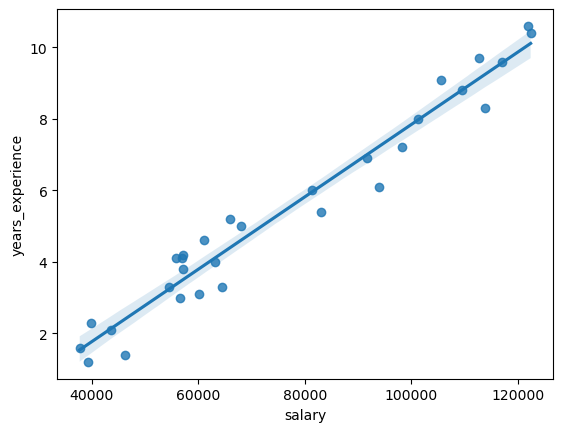

In [10]:
# Обе переменные распределены нормально, так что построим модель линейной регрессии. Сначала построим диаграмму рассеяния, чтобы убедитьтся,
# что переменные обладают линейной взаимосвязью
sns.regplot(
    x=salary.salary, 
    y=salary.years_experience, 
    data=salary)
None

In [32]:
# Очевидно между переменными есть сильная линейная взаимосвязь. Опишем ее с помощью линейной регрессии

import statsmodels.api as sm
import statsmodels.formula.api as smf
y=salary.salary
X=salary.years_experience
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        23:12:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Заметим также, что R^2 у предполагаемой модели 0.95, что является очень хорошим показателем
# Сделаем fit-predict в модель линейной регрессии
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X) # предсказанные значения
res = y - y_pred # остатки

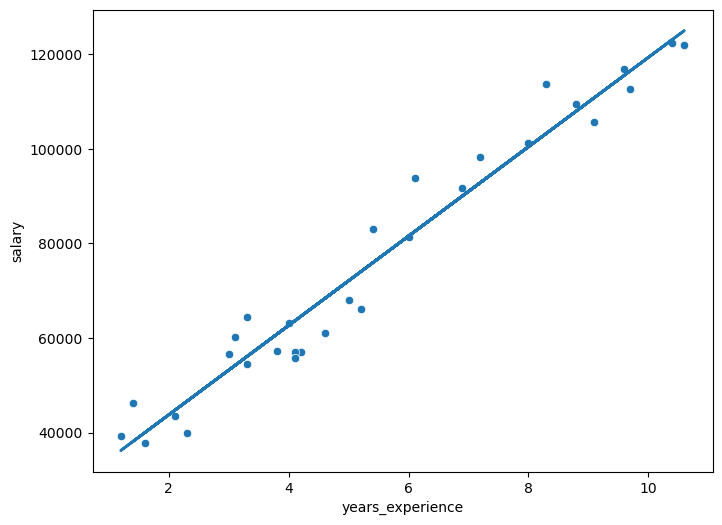

In [71]:
# График линейной прямой, описывающей уравнение регресии
plt.figure(figsize=(8, 6))
sns.scatterplot(x=salary.years_experience, y=salary.salary, data=salary)
plt.plot(salary.years_experience, y_pred, linewidth=2)
plt.show()

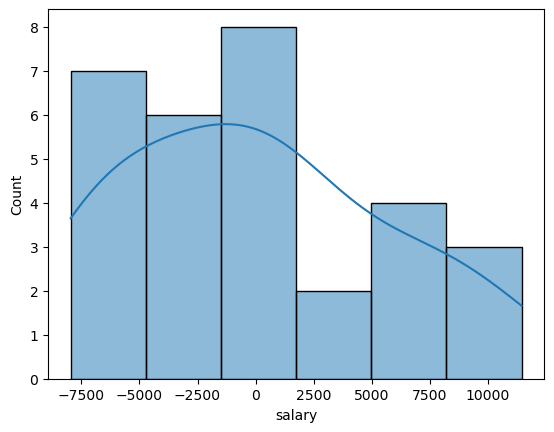

In [65]:
# Проведем анализ остатков. Проверим, нормально ли они распределены
sns.histplot(data=res, kde=True)
None

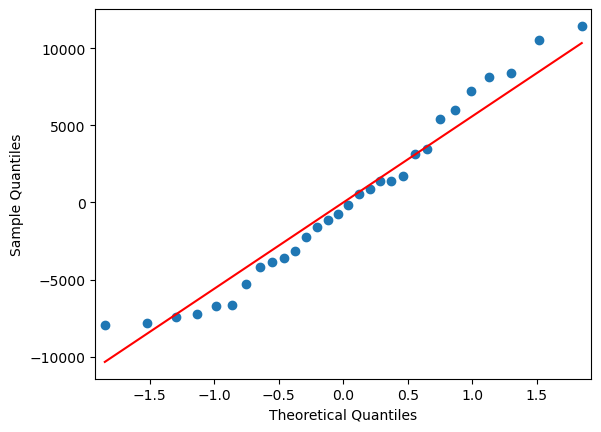

In [66]:
fig = sm.qqplot(res, line='s') # значения слабо отклоняются от теоретической прямой
plt.show()

In [67]:
# проверим гипотезу о нормальности распределения остатков критерием колмогорова смирнова
expected = norm(loc=res.mean(), scale=res.std()).rvs(size=res.shape[0])
ks_test = kstest(res, expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.5940706297759378


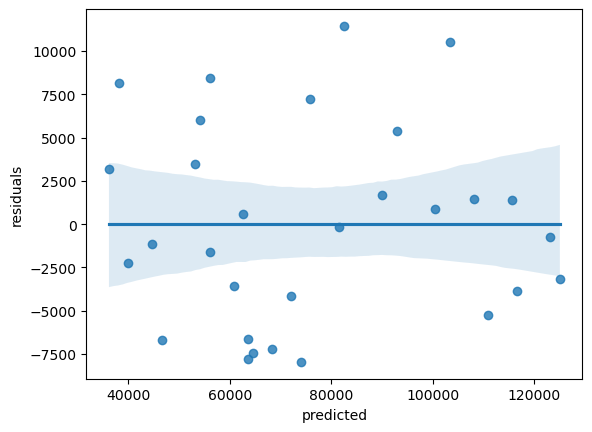

In [68]:
# в итоге можем считать, что остатки распределены нормально. проверим, есть ли зависимость между остатками и предиктами
predicted_residuals = pd.concat([pd.Series(res),pd.Series(y_pred)], axis=1, keys= ['residuals', 'predicted'])
sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

In [69]:
# Зависимости нет. теперь проверим гипотезу о равенстве средних построенной модели и модели, предсказывающей значение по средним
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('salary ~ years_experience', data=salary).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
years_experience,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


In [73]:
# p-значение в крайней правой колонке ниже 0.05, поэтому отклоняем гипотезу о равенстве средних. значит модель можно считать
# достаточно точной.

# задача 2

In [121]:
cars.head()

,REGION,DOORS,ENGINE SIZE,WEIGHT,PRICE
0,USA,3,1299,871,18995
1,Asia,5,1343,935,25500
2,Eur,5,1390,960,22990
3,Asia,4,1497,940,26000
4,Eur,3,1581,1050,27995


In [122]:
cars = cars.rename(columns={'REGION' : 'region', 
                            'DOORS' : 'doors', 
                            'ENGINE SIZE' : 'engine_size', 
                            'WEIGHT' : 'weight', 
                            'PRICE' : 'price'})
# переведем регион в численный признак
cars['region'].replace(['USA', 'Asia', 'Eur', 'Aust'],
                        [0, 1, 2, 3], inplace=True)

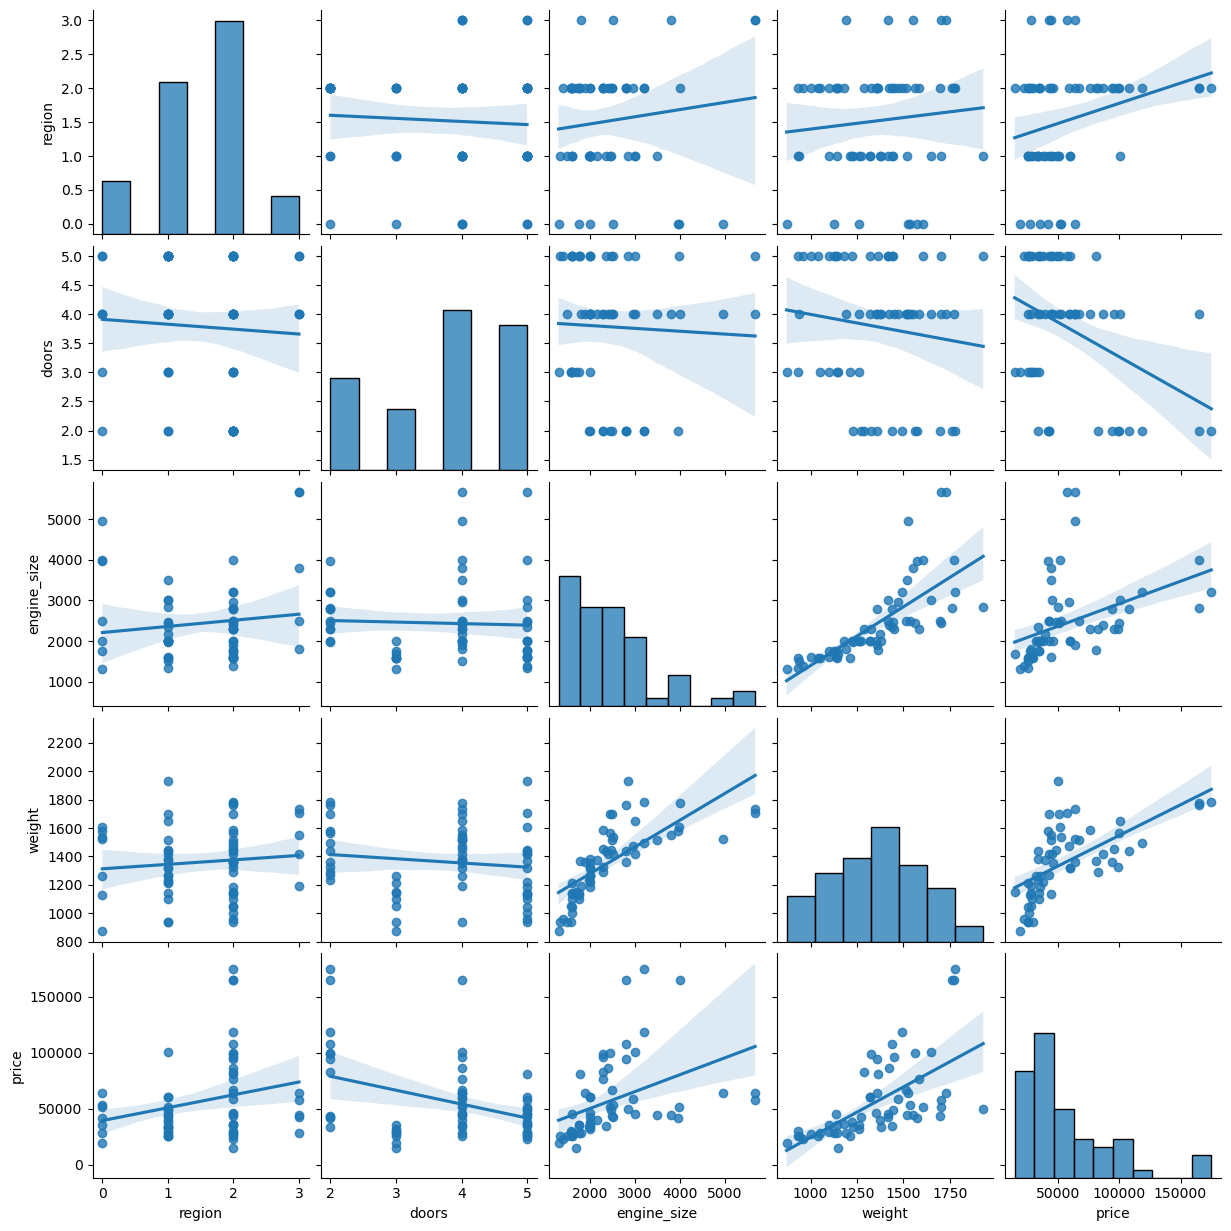

In [108]:
sns.pairplot(data=cars, 
             kind='reg', 
             diag_kind='auto')
None

In [110]:
# некоторую корреляцию можно проследить между price с engine_size и price с weight. проверим корреляцию по пирсону
# а для этого исследуем с помошью стат критериев нормальность распределения каждой из переменных

# price
expected_price = norm(loc=cars.price.mean(), scale=cars.price.std()).rvs(size=cars.price.shape[0])
ks_test_price = kstest(cars.price, expected_price)
print('price p-value: ' + str(ks_test_price.pvalue))

#Region
expected_region = norm(loc=cars.region.mean(), scale=cars.region.std()).rvs(size=cars.region.shape[0])
ks_test_region = kstest(cars.region, expected_region)
print('region p-value: ' + str(ks_test_region.pvalue))

#doors
expected_doors = norm(loc=cars.doors.mean(), scale=cars.doors.std()).rvs(size=cars.doors.shape[0])
ks_test_doors = kstest(cars.doors, expected_doors)
print('doors p-value: ' + str(ks_test_doors.pvalue))

#engine_size
expected_engine_size = norm(loc=cars.engine_size.mean(), scale=cars.engine_size.std()).rvs(size=cars.engine_size.shape[0])
ks_test_engine_size = kstest(cars.engine_size, expected_engine_size)
print('engine_size p-value: ' + str(ks_test_engine_size.pvalue))

#weight
expected_weight = norm(loc=cars.weight.mean(), scale=cars.weight.std()).rvs(size=cars.weight.shape[0])
ks_test_weight = kstest(cars.weight, expected_weight)
print('weight p-value: ' + str(ks_test_weight.pvalue))

price p-value: 0.37773061749650066
region p-value: 0.004627144187221645
doors p-value: 0.015787628382725075
engine_size p-value: 0.2671202776187836
weight p-value: 0.9284371795338576


In [111]:
# мы можем принять гипотезу о нормальности распределений price, engine_size, weight
# для исследования корреляции между doors с price и region с price будем использовать коэф спирмена

# корр по пирсону между price и engine_size
print('T-test: ' + str(stats.ttest_ind(cars.price, cars.engine_size).pvalue))
print('corr coef: ' + str(correlation(cars.price, cars.engine_size)))

T-test: 1.1737135614519224e-21
corr coef: 0.4093593405684656


In [101]:
# корр между price и weight
print('T-test: ' + str(stats.ttest_ind(cars.price, cars.weight).pvalue))
print('corr coef: ' + str(correlation(cars.price, cars.weight)))

T-test: 3.227088733956145e-22
corr coef: 0.6245104147873548


In [104]:
# между price и doors
rho, p = spearmanr(cars.price, cars.doors)
print('spearman correlation coefficient: ' + str(rho))
print('spearman P-value: ' + str(p))
# принимаем гипотезу о равенстве нулю истинной корреляции и убираем из модели doors

spearman correlation coefficient: -0.24830572441694337
spearman P-value: 0.05574990719293216


In [115]:
# между price и region
rho, p = spearmanr(cars.price, cars.region)
print('spearman correlation coefficient: ' + str(rho))
print('spearman P-value: ' + str(p))
# не принимаем гипотезу о равенстве нулю истинной корреляции, признак оставляем

spearman correlation coefficient: 0.2613574199198836
spearman P-value: 0.04368641239705919


In [123]:
cars = cars.drop(['doors'], axis='columns')

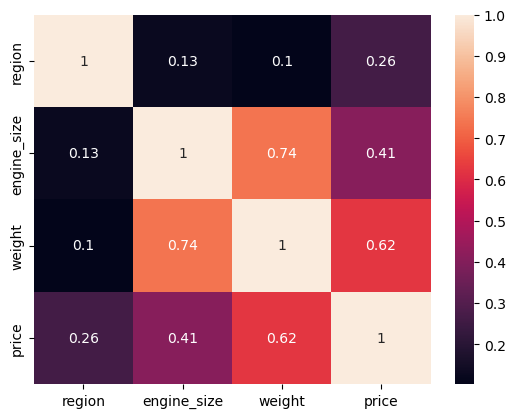

In [125]:
# посмотрим мультиколлинеарность
sns.heatmap(cars.corr(), annot = True)
None

In [126]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [130]:
# у weight с engine_size высокая корреляция. посмотрим по R^2, без какого признака модель будет лучше
y=cars.price
X=cars[['region', 'engine_size']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     7.687
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00111
Time:                        23:24:36   Log-Likelihood:                -706.47
No. Observations:                  60   AIC:                             1419.
Df Residuals:                      57   BIC:                             1425.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8186.6596   1.31e+04      0.624      0.535   -1.81e+04    3.44e+04
region       9379.7060   5206.630      1.801      0.077   -1046.391    1.98e+04
engine_size    14.1166      4.374      3.227      0.002       5.358      22.875
==============================================================================
Omnibus:                       20.301   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.912
Skew:                           1.296   Prob(JB):                     8.69e-07
Kurtosis:                       5.108   Cond. No.                     8.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
# у weight с engine_size высокая корреляция. посмотрим по R^2, без какого признака модель будет лучше
y=cars.price
X=cars[['region', 'weight']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     21.45
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.14e-07
Time:                        23:24:49   Log-Likelihood:                -696.80
No. Observations:                  60   AIC:                             1400.
Df Residuals:                      57   BIC:                             1406.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.508e+04   2.05e+04     -3.663      0.001   -1.16e+05    -3.4e+04
region      8766.6383   4419.851      1.983      0.052     -83.960    1.76e+04
weight        87.1795     14.519      6.004      0.000      58.105     116.254
==============================================================================
Omnibus:                        7.899   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.135
Skew:                           0.738   Prob(JB):                       0.0282
Kurtosis:                       3.823   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# без engine_size R^2 выше. оставляем weight
# причем заметим также что р-значение у коэфа region >0.05 знач можно убрать и его
# так как он вносит незначительный вклад в модель регресии
# таким образом, финальный вариант модели
y=cars.price
X=cars.weight
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     37.08
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           9.69e-08
Time:                        23:26:45   Log-Likelihood:                -698.81
No. Observations:                  60   AIC:                             1402.
Df Residuals:                      58   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.581e+04   2.05e+04     -3.217      0.002   -1.07e+05   -2.49e+04
weight        90.1451     14.803      6.090      0.000      60.514     119.776
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.971
Skew:                           0.894   Prob(JB):                      0.00684
Kurtosis:                       3.891   Cond. No.                     7.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# построим линейную регрессию и посмотрим остатки

In [134]:
# Сделаем fit-predict в модель линейной регрессии
lr2 = LinearRegression()
lr2.fit(X, y)
price_pred = lr2.predict(X) # предсказанные значения
res2 = cars.price - price_pred # остатки

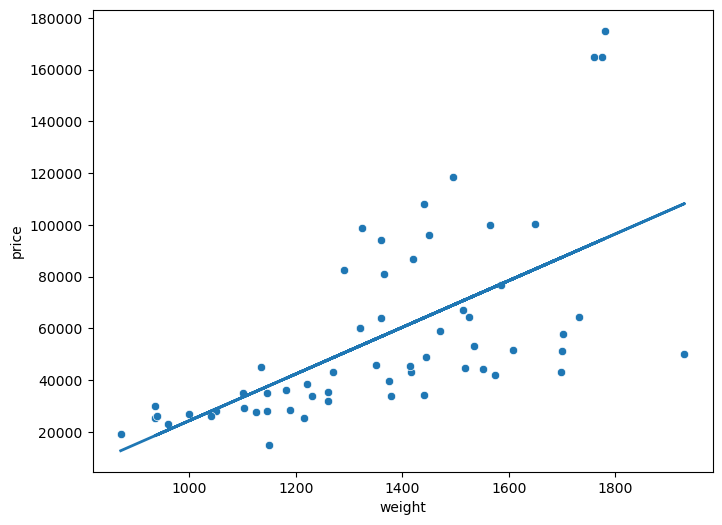

In [136]:
# График линейной прямой, описывающей уравнение регресии
y=cars.price
X=cars.weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x=cars.weight, y=cars.price, data=salary)
plt.plot(X, price_pred, linewidth=2)
plt.show()

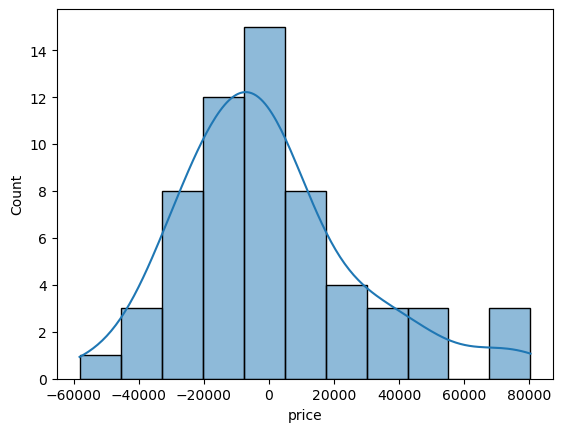

In [137]:
# Проведем анализ остатков. Проверим, нормально ли они распределены
sns.histplot(data=res2, kde=True)
None

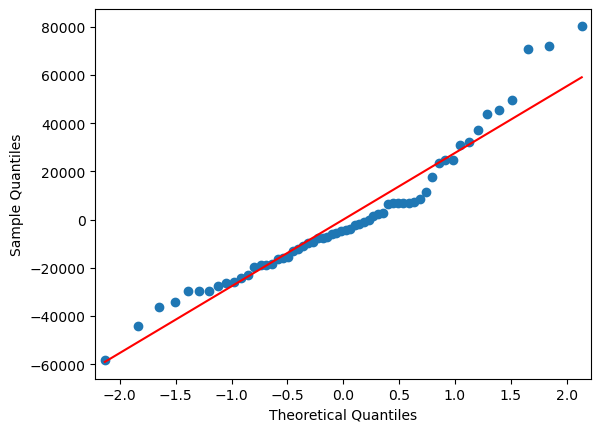

In [138]:
fig = sm.qqplot(res2, line='s') # значения слабо отклоняются от теоретической прямой
plt.show()

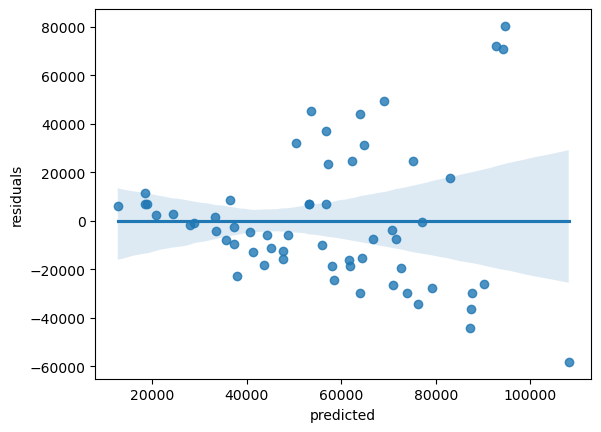

In [139]:
# в итоге можем считать, что остатки распределены нормально. проверим, есть ли зависимость между остатками и предиктами
predicted_residuals = pd.concat([pd.Series(res2),pd.Series(price_pred)], axis=1, keys= ['residuals', 'predicted'])
sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

In [140]:
# Зависимости нет. теперь проверим гипотезу о равенстве средних построенной модели и модели, предсказывающей значение по средним
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ weight', data=cars).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
weight,1.0,2.935512e+10,2.935512e+10,37.084034,9.692179e-08
Residual,58.0,4.591186e+10,7.915838e+08,NaN,NaN


In [141]:
# p-значение в крайней правой колонке ниже 0.05, поэтому отклоняем гипотезу о равенстве средних. значит модель можно считать
# достаточно точной.